Enter the number of rows in the grid:  5
Enter the number of columns in the grid:  5


Enter the grid row by row (0 for walkable, 1 for obstacle):


Row 1:  0 0 0 0 0
Row 2:  0 1 1 1 0
Row 3:  0 0 0 1 0
Row 4:  0 1 0 0 0
Row 5:  0 0 0 0 0
Enter start position (x y):  0 0
Enter goal position (x y):  4 4


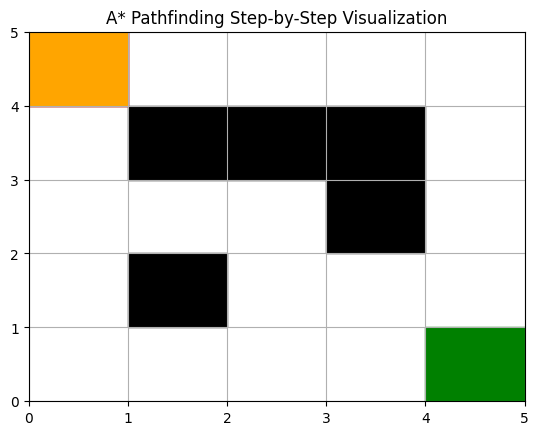

<Figure size 640x480 with 0 Axes>

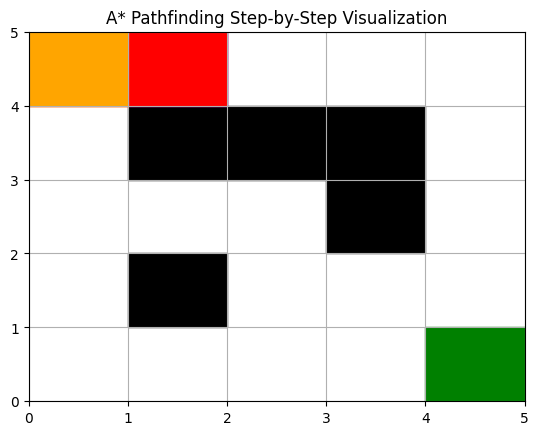

<Figure size 640x480 with 0 Axes>

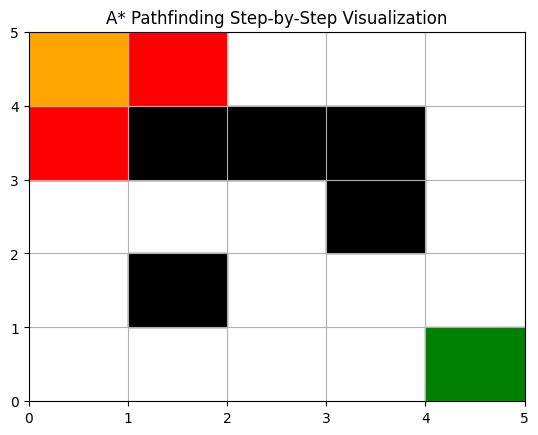

<Figure size 640x480 with 0 Axes>

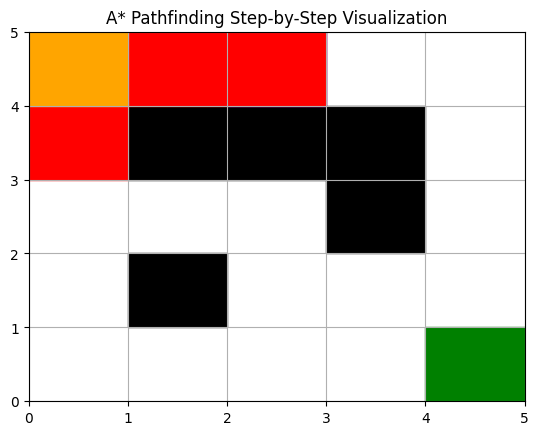

<Figure size 640x480 with 0 Axes>

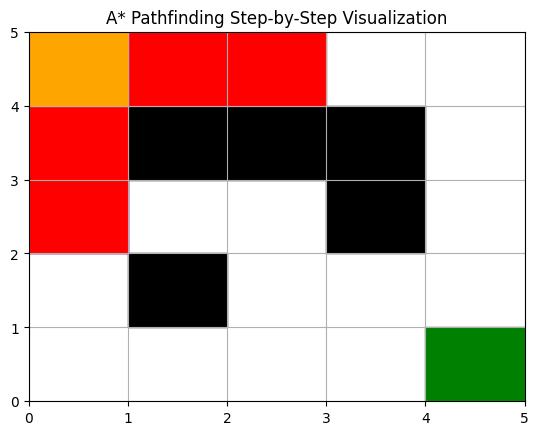

<Figure size 640x480 with 0 Axes>

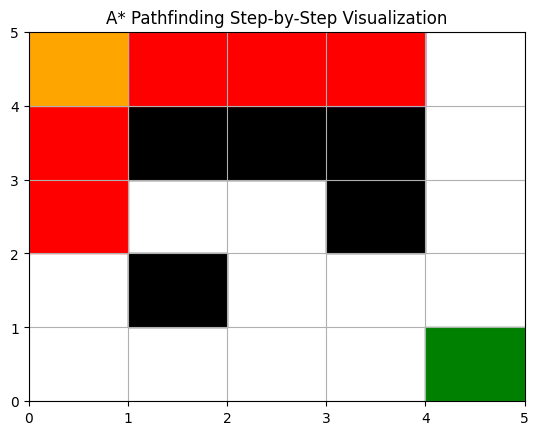

<Figure size 640x480 with 0 Axes>

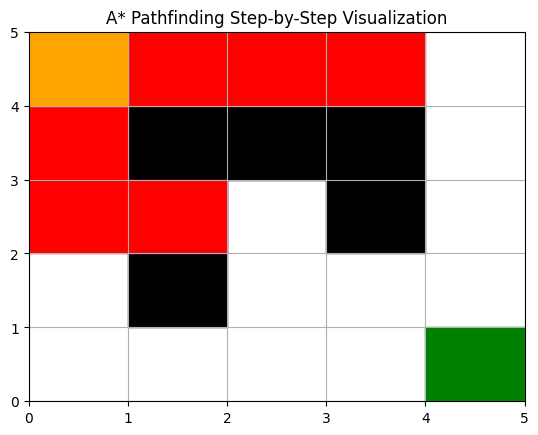

<Figure size 640x480 with 0 Axes>

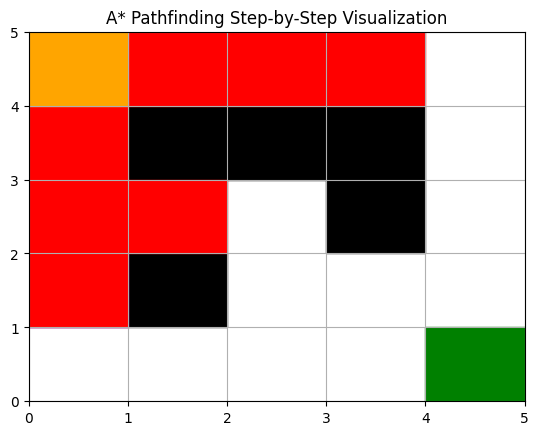

<Figure size 640x480 with 0 Axes>

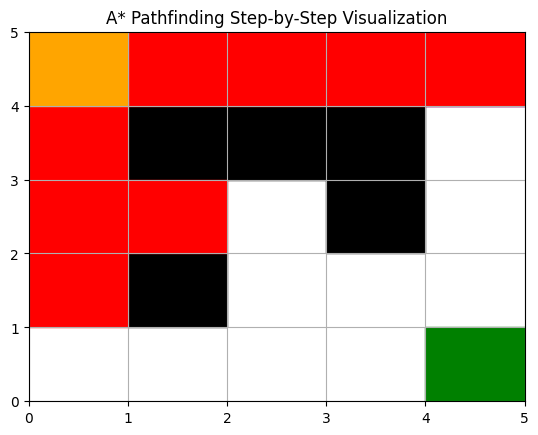

<Figure size 640x480 with 0 Axes>

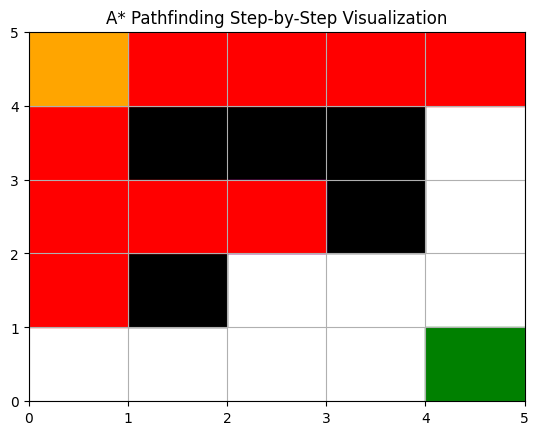

<Figure size 640x480 with 0 Axes>

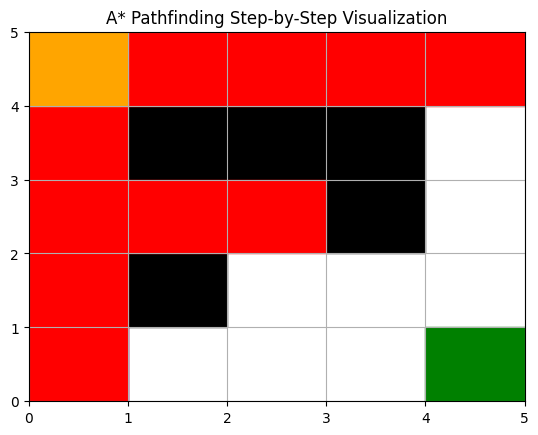

<Figure size 640x480 with 0 Axes>

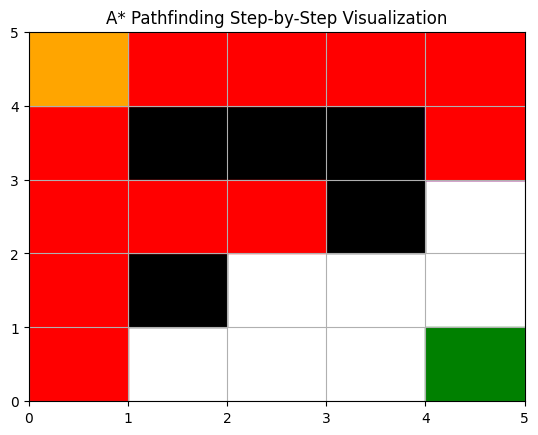

<Figure size 640x480 with 0 Axes>

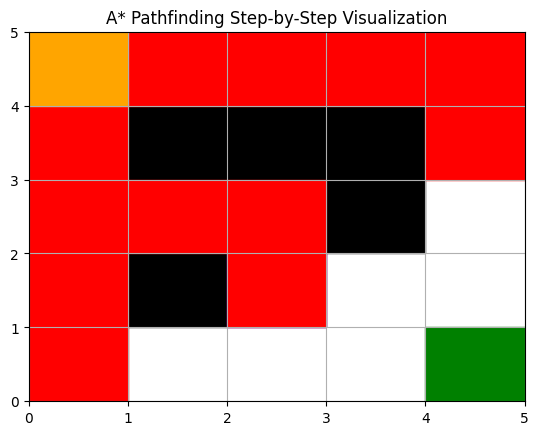

<Figure size 640x480 with 0 Axes>

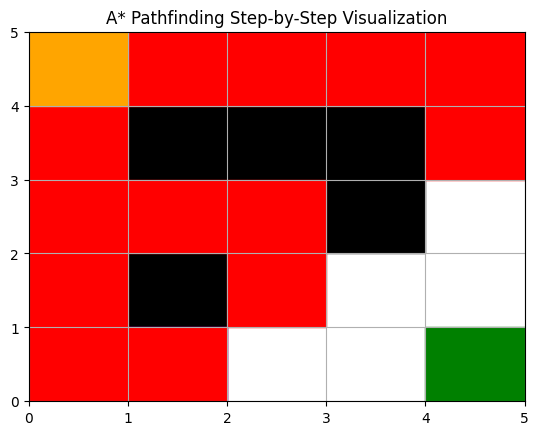

<Figure size 640x480 with 0 Axes>

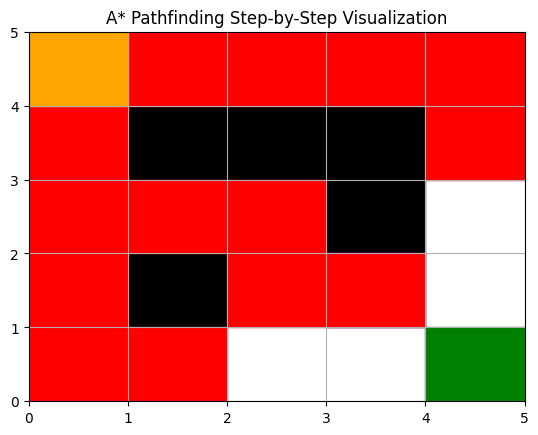

<Figure size 640x480 with 0 Axes>

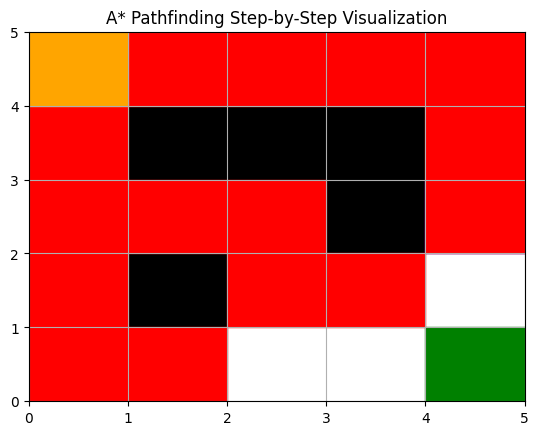

<Figure size 640x480 with 0 Axes>

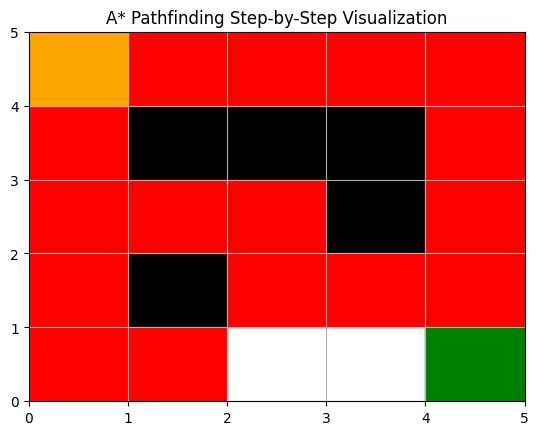

<Figure size 640x480 with 0 Axes>

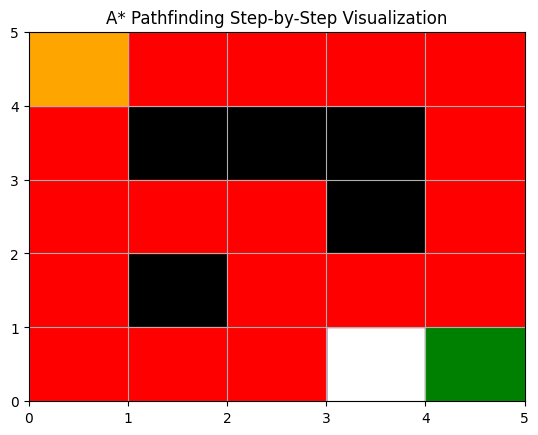

<Figure size 640x480 with 0 Axes>

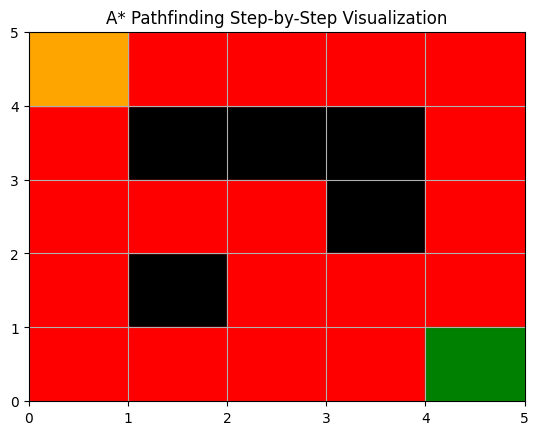

Steps to reach the goal (from start to goal):
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 2)
(3, 2)
(3, 3)
(3, 4)
(4, 4)


<Figure size 640x480 with 0 Axes>

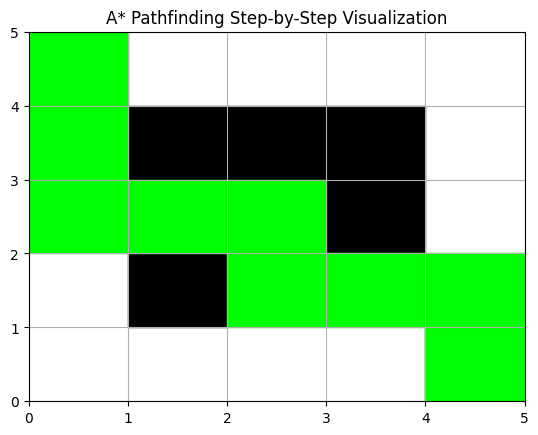

<Figure size 640x480 with 0 Axes>

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position
        self.parent = parent
        self.g = g  # Cost from start to current node
        self.h = h  # Estimated cost to goal
        self.f = g + h  # Total cost

    def __lt__(self, other):
        return self.f < other.f  # Needed for priority queue

def heuristic(a, b):
    """Calculate Manhattan distance"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    open_list = []
    closed_set = set()
    start_node = Node(start, None, 0, heuristic(start, goal))
    heapq.heappush(open_list, start_node)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    step_by_step = []

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                step_by_step.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], step_by_step

        closed_set.add(current_node.position)

        # Evaluate neighbors
        for dx, dy in directions:
            neighbor_pos = (current_node.position[0] + dx, current_node.position[1] + dy)

            if (neighbor_pos[0] < 0 or neighbor_pos[0] >= len(grid) or
                neighbor_pos[1] < 0 or neighbor_pos[1] >= len(grid[0]) or
                grid[neighbor_pos[0]][neighbor_pos[1]] == 1 or
                neighbor_pos in closed_set):
                continue  # Skip walls and visited nodes

            g_cost = current_node.g + 1
            h_cost = heuristic(neighbor_pos, goal)
            new_node = Node(neighbor_pos, current_node, g_cost, h_cost)

            # Add to open list only if not already in it with lower f
            if all(n.position != new_node.position for n in open_list):
                heapq.heappush(open_list, new_node)

        visualize_step(grid, current_node.position, open_list, closed_set, start, goal)

    return None, step_by_step  # No path found

def visualize_step(grid, current_position, open_list, closed_set, start, goal, final_path=None):
    """Visualize grid, walls, current node, open list, closed set, and final path"""
    maze_array = np.array(grid)
    fig, ax = plt.subplots()
    ax.set_xticks(range(len(grid[0]) + 1))
    ax.set_yticks(range(len(grid) + 1))
    ax.grid(True)

    for row in range(len(grid)):
        for col in range(len(grid[0])):
            if grid[row][col] == 1:
                ax.add_patch(plt.Rectangle((col, len(grid) - row - 1), 1, 1, color='black'))

    if current_position:
        ax.add_patch(plt.Rectangle((current_position[1], len(grid) - current_position[0] - 1), 1, 1, color='blue'))

    for row, col in closed_set:
        ax.add_patch(plt.Rectangle((col, len(grid) - row - 1), 1, 1, color='red'))

    ax.add_patch(plt.Rectangle((start[1], len(grid) - start[0] - 1), 1, 1, color='orange'))
    ax.add_patch(plt.Rectangle((goal[1], len(grid) - goal[0] - 1), 1, 1, color='green'))

    if final_path:
        for (x, y) in final_path:
            ax.add_patch(plt.Rectangle((y, len(grid) - x - 1), 1, 1, color='lime'))

    plt.title("A* Pathfinding Step-by-Step Visualization")
    plt.pause(0.5)
    plt.clf()

def get_input():
    """Get user input for grid and positions"""
    rows = int(input("Enter the number of rows in the grid: "))
    cols = int(input("Enter the number of columns in the grid: "))
    grid = []

    print("Enter the grid row by row (0 for walkable, 1 for obstacle):")
    for i in range(rows):
        row = list(map(int, input(f"Row {i + 1}: ").split()))
        grid.append(row)

    start_x, start_y = map(int, input("Enter start position (x y): ").split())
    goal_x, goal_y = map(int, input("Enter goal position (x y): ").split())
    start = (start_x, start_y)
    goal = (goal_x, goal_y)
    return grid, start, goal

# Run program
if __name__ == "__main__":
    grid, start, goal = get_input()
    path, step_by_step = astar(grid, start, goal)

    if path:
        print("Steps to reach the goal (from start to goal):")
        for step in path:
            print(step)
        visualize_step(grid, None, None, set(), start, goal, final_path=path)
    else:
        print("No path found.")
